[source Article: Let's Figure It Out](https://letsfigureout.com/2020/04/13/building-a-perceptron-with-python/)

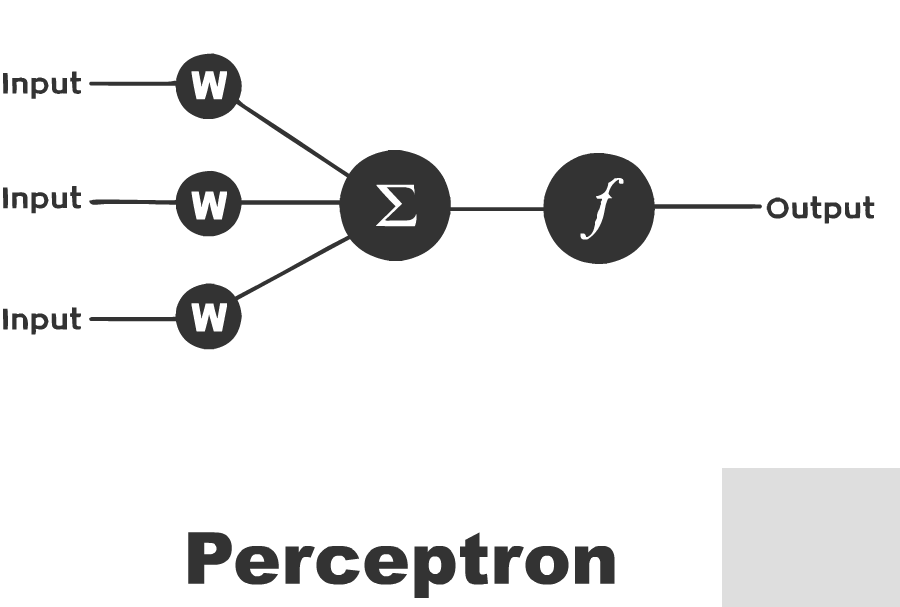

In [11]:
from IPython.display import Image
Image('/tmp/netcom_dataScience_dataAnalytics/src/photos/Perceptron.png')

# What is a Perceptron
----
* Core Building Block of a Neural net
* Binary classification algorithm that makes predictions using linear prediciton functions.

### Perceptron Use Cases
----
* Common to classify different types of data

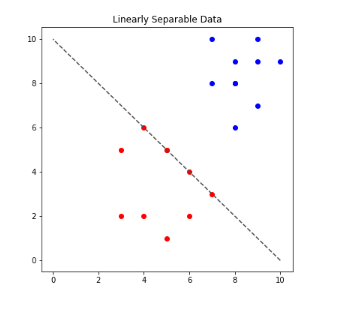

In [12]:
from IPython.display import Image
Image('/tmp/netcom_dataScience_dataAnalytics/src/photos/perceptron_linear_separation.png')

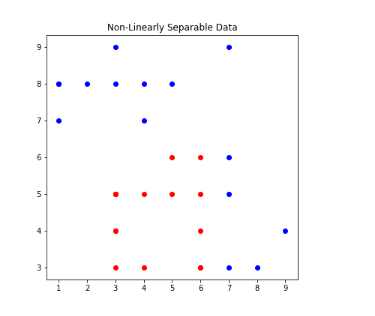

In [13]:
from IPython.display import Image
Image('/tmp/netcom_dataScience_dataAnalytics/src/photos/perceptron_nonlinear_separation.png')

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class Perceptron(object):
    def __init__(self, lr=0.01, epochs=2000):
        self.lr = lr #learning rate
        self.bias = 1 #implicit bias
        self.epochs = epochs # how long to train for
        self.weights = None # weights initial
        self.errors_ = [] # errors to change weights with


    def fit(self, X, y):
        """Train perceptron. 
        X and y need to be the same length"""
        assert len(X) == len(y), "X and y need to be the same length"
        
        # Initialise weights
        weights = np.zeros(X.shape[1])
        # This is the Bias Value,X0 has to be 1 in order to
        # make sure we don't recieve 0 if one of our weights is 0
        self.weights = np.insert(weights, 0, self.bias, axis=0)

        for _ in range(self.epochs):
            # This is where the magic happens
            # Error here is the difference between true and false label
            # that Error is added to the original weights to modify
            # existing weights
            errors = 0
            for xi, y_target in zip(X, y):
                # perceptrons learn by updating the weights
                # 
                z = self.__linear(xi)  # weighted sum
                y_hat = self.__activation(z)  # activation function
                delta = self.lr * (y_target - y_hat)  # loss
        
                # Update weights - back propagation
                self.weights[1:] += delta * xi
                self.weights[0] += delta
                
                errors += int(delta != 0.0)

            self.errors_.append(errors)          
            if not errors:
                break
    
    #Performing a weighted sum on all the inputs
    def __linear(self, X):
        """weighted sum"""
        #just implemented with np.dot
        # x1 * w1 + x2 * w2 ...xn * wn ... + w0
        return np.dot(X, self.weights[1:]) + self.weights[0] 

    # Weighted sum of inputs is passed through the activation
    # If the value  from the weighted sum is > 0 return a 1
    # else return 0
    def __activation(self, X):
        return np.where(X>=0, 1, 0)
                        
    
    def predict(self, X):
        assert type(self.weights) != 'NoneType', "You must run the fit method before making predictions."
        y_hat = np.zeros(X.shape[0],)
        for i, xi in enumerate(X):
            y_hat[i] = self.__activation(self.__linear(xi))
        return y_hat


    def score(sef, predictions, labels):
        return accuracy_score(labels, predictions)
    
    
    def plot(self, predictions, labels):
        assert type(self.weights) != 'NoneType', "You must run the fit method before being able to plot results."
        plt.figure(figsize=(10,8))
        plt.grid(True)

        for input, target in zip(predictions, labels):
            plt.plot(input[0],input[1],'ro' if (target == 1.0) else 'go')

        for i in np.linspace(np.amin(predictions[:,:1]),np.amax(predictions[:,:1])):
            slope = -(self.weights[0]/self.weights[2])/(self.weights[0]/self.weights[1])  
            intercept = -self.weights[0]/self.weights[2]

            # y = mx+b, equation of a line. mx = slope, n = intercept
            y = (slope*i) + intercept
            plt.plot(i, y, color='black', marker='x', linestyle='dashed')

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs


In [10]:
# Generate data blobs, 2 features each with two classses
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.05, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

# Create an instance of our Perceptron
p = Perceptron1()

# Fit the data, display and display our accuracy score
p.fit(X_train,y_train)
p.score(p.predict(X_test), y_test)

1.0